In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra equations

Consider the IVP

$$
\begin{aligned}
\dot{x} = x - xy \\
\dot{y} = xy - y,
\end{aligned}
$$

with initial value $(x_{0}, y_{0}) = (1, 2)$. There is no closed form solution to this system of ODEs. We compare performances of RK4 and simple Euler for different values of step-size $h$.

## LV equation

In [2]:
def LV(x, y):
    return np.array([x - x*y, x*y - y])

## Euler 

In [3]:
def euler(f, x0, y0, h, n):

    v = [0]*(n+1)
    v[0] = np.array([x0, y0])
    x = x0 
    y = y0

    for i in range(1, n + 1):
        v[i] =  v[i-1] + h*f(x, y)
        x = v[i][0]
        y = v[i][1]

    t = np.array([i*h for i in range(0, n+1)])
    return t, np.array(v)

## Runge-Kutta methods(4)

In [6]:
def rk4(f, x0, y0, h, n):
    
    v = [0]*(n+1)
    v[0] = np.array([x0, y0])
    x = x0 
    y = y0
    for i in range(1, n + 1):
        k1 = h*f(x, y)
        k2 = h*f(x + 0.5*k1[0], y + 0.5*k1[1])
        k3 = h*f(x + 0.5*k2[0], y + 0.5*k2[1])
        k4 = h*f(x + k3[0], y + k3[1])
        v[i] =  v[i-1] + (k1 + k2 + k2 + k3 + k3 + k4)/6
        x = v[i][0]
        y = v[i][1]

    t = np.array([i*h for i in range(0, n+1)])
    return t, np.array(v)

## Utils - Plot integrator

In [35]:
def plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, h, only_GT=False):
    
    if only_GT:
        fig = plt.figure(figsize=(9,8))
        ax0 = fig.add_subplot(111)
        ax0.plot(t_true, v_true)
        ax0.set_ylim(0, 2.5)
        ax0.set_xlabel(r"t", fontsize=25)
        ax0.set_xlabel(r"$t$", fontsize=25)
        ax0.set_title("Lotka-Volterra equations Plotting", fontsize=25)
        ax0.legend(["x True", "y True"])
        
    else:
        fig = plt.figure(figsize=(18,8))
        ax0 = fig.add_subplot(121)
        ax1 = fig.add_subplot(122)

        ax0.plot(t_euler, v_euler, marker = 'x', linestyle="--")
        ax1.plot(t_rk4, v_rk4, marker = 'x', linestyle="--")

        ax0.plot(t_true, v_true)
        ax1.plot(t_true, v_true)

        ax0.set_ylim(0, 3.5)
        ax1.set_ylim(0, 3.5)

        ax0.set_xlabel(r"t", fontsize=25)
        ax0.set_title("Euler, $h=$"+h, fontsize=25)
        ax0.legend(["x Euler", "y Euler", "x True", "y True"])
        ax1.set_xlabel(r"$t$", fontsize=25)
        ax1.set_title("RK4, $h=$"+h, fontsize=25)
        ax1.legend(["x RK4", "y RK4", "x True", "y True"])

## GT LV equation plot

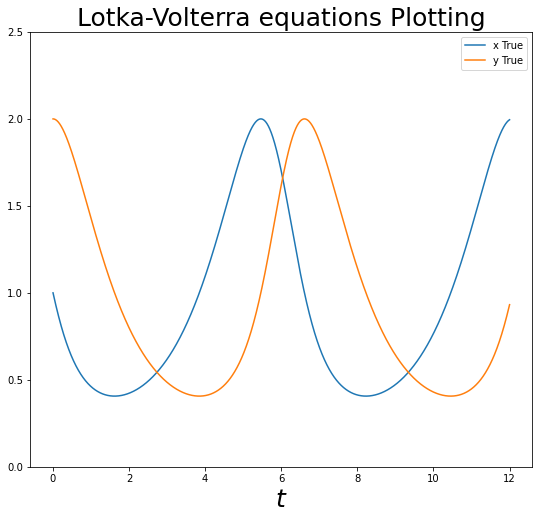

In [36]:
plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, str(h), only_GT=True)

## 60 Step, 0.2 Step-size

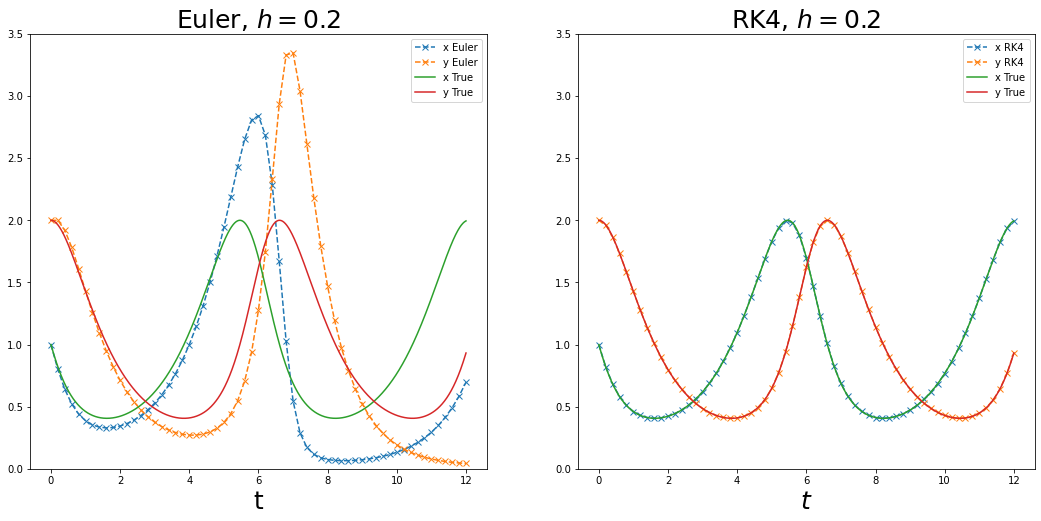

In [8]:
h = 0.2

t_euler, v_euler = euler(LV, 1., 2., h, 60)
t_rk4, v_rk4 = rk4(LV, 1., 2., h, 60)
t_true, v_true = rk4(LV, 1., 2., 0.003, 4000)

plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, str(h))

## 120 Step, 0.1 Step-size

- Euelr Method의 경우, Stpe 수를 더욱 많이 가져갈 수록 Fitting의 정도가 개선되는 것을 볼 수 있음

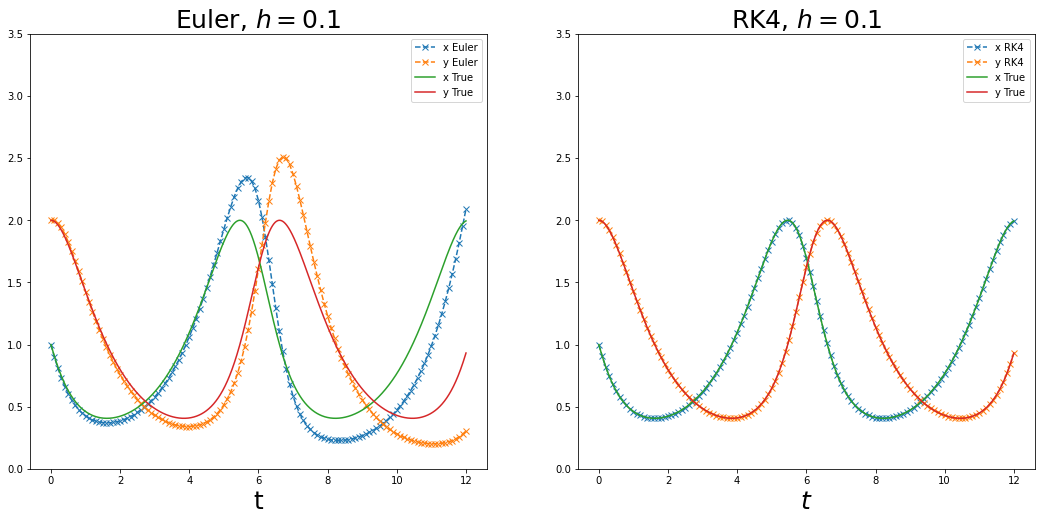

In [19]:
h = 0.1

t_euler, v_euler = euler(LV, 1., 2., h, 120)
t_rk4, v_rk4 = rk4(LV, 1., 2., h, 120)
t_true, v_true = rk4(LV, 1., 2., 0.003, 4000)

plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, str(h))

## 240 Step, 0.05 Step-size

- Euelr Method의 경우, Stpe 수를 더욱 많이 가져갈 수록 Fitting의 정도가 개선되는 것을 볼 수 있음

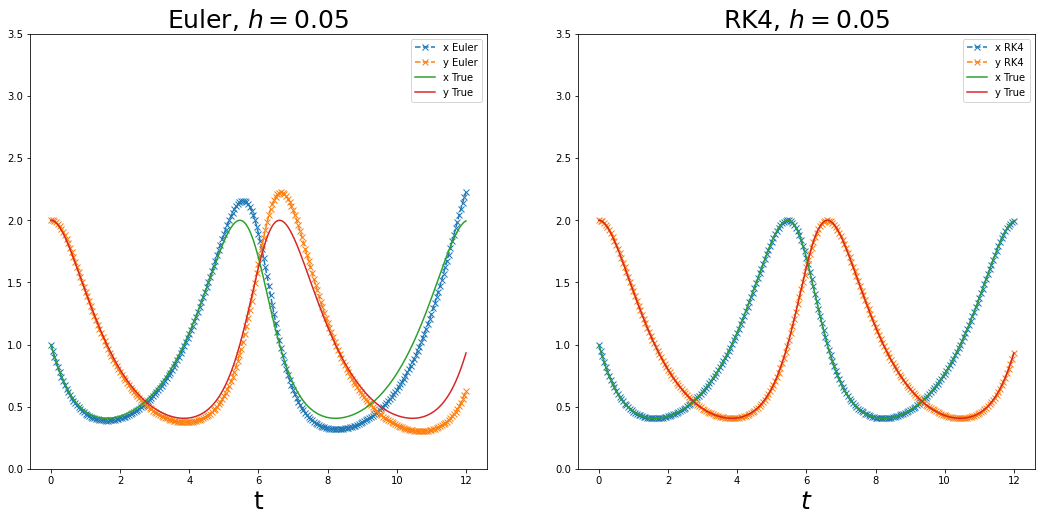

In [21]:
h = 0.05

t_euler, v_euler = euler(LV, 1., 2., h, 240)
t_rk4, v_rk4 = rk4(LV, 1., 2., h, 240)
t_true, v_true = rk4(LV, 1., 2., 0.003, 4000)

plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, str(h))